In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.genfromtxt("SimpleSurface.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(float)

In [3]:
print(Header)

['iter', 't', 'dt', 'X(1)', 'HX(6)', 'OX(7)', 'CH3X(8)', 'HOX(9)', 'H2OX(10)', 'CO2X(13)', 'OCX(15)', 'CX(16)', 'CH2X(17)', 'CHX(18)', 'CH4X(19)', 'NOX(20)', 'NO2X(21)', 'HO2X(28)', 'CHOX(45)', 'CHO2X(46)', 'COX(47)', 'H2X(48)', 'NO2X(59)']


In [4]:
def makePlotV2(x, y1, y2, y3, info, fig_name):
    loc_x = info['loc_x']
    loc_y = info['loc_y']
    
    ys1 = info['label1']['scale']
    ys2 = info['label2']['scale']
    ys3 = info['label3']['scale']
    
    label1 = info['label1']['label'] + ' x'+str(ys1)
    label2 = info['label2']['label'] + ' x'+str(ys2)
    label3 = info['label3']['label'] + ' x'+str(ys3)
    
    fig, ax = plt.subplots(figsize=[5,4])
    p1 = ax.plot(x, y1/ys1,'r-',label = label1)
    p2 = ax.plot(x, y2/ys2,'g-',label = label2)
    p3 = ax.plot(x, y3/ys3,'b-',label = label3)
    plt.xlabel(info['xlabel'])
    plt.ylabel(info['ylabel'])
    plt.xscale('log')
    
    plt.xlim(info['xlim'])
    plt.ylim(info['ylim'])
     # added these three lines
    lns = p1+p2+p3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, bbox_to_anchor=(loc_x, loc_y),frameon=False)
    
    plt.savefig(fig_name,bbox_inches='tight')
    
    return


/var/folders/np/m42416h166j90krvxmfl40940000gp/T/ipykernel_87123/3915406409.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(info['xlim'])


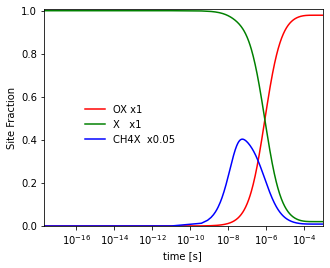

In [6]:
info={}
info['label1'] = {'label':'OX','scale':1}
info['label2'] = {'label':'X  ','scale':1}
info['label3'] = {'label':'CH4X ','scale':5e-2}
info['xlabel'] = 'time [s] '
info['ylabel'] = 'Site Fraction'
info['loc_x'] = 0.5
info['loc_y'] = 0.6
info['xlim'] = [0,1e-3]
info['ylim'] = [0.,1+1e-2]
x  = solTchem[:,Header.index('t')]
y1 = solTchem[:,Header.index('OX(7)')]
y2 = solTchem[:,Header.index('X(1)')]
y3 = solTchem[:,Header.index('CH4X(19)')]

makePlotV2(x, y1, y2, y3, info, 'SimpleSurface.pdf')